<a href="https://colab.research.google.com/github/Meetra21/An-Algorithm-for-Book-Recommendation/blob/main/Books_Recommender_system_using_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Books Recommender system using clustering
Collaborative filtering
- Dataset :- https://www.kaggle.com/ra4u12/bookrecommendation

### Project Statement
This project is focused on building a Books Recommender System that suggests books to users based on their interests. The system uses a machine learning model to find books that are similar to a given book based on user ratings. By analyzing how users rate different books, the system can recommend new books that a user might like.

The goal of the project is to create a system that processes book data, uses clustering techniques, and then provides book recommendations. This can help people discover new books that match their preferences, making it a helpful tool for book lovers or websites that want to offer personalized book suggestions.

### About the Dataset
The dataset used in this project comes from Kaggle’s Book Recommendation Dataset and includes three main files:

#### Books Data (BX-Books.csv):
This file contains information about the books, including the title, author, publication year, publisher, and an image URL for the book cover. It has more than 271,000 book entries.

#### Users Data (BX-Users.csv):
This file includes details about the users, like user ID, location, and age. It helps us understand who is rating the books.

#### Ratings Data (BX-Book-Ratings.csv):
This file contains over a million ratings that users have given to books. Each record connects a user with a book (by its ISBN) and shows how they rated it.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the datasets with on_bad_lines='skip'
books = pd.read_csv('BX-Books.csv', sep=";", on_bad_lines='skip', encoding='latin-1')
users = pd.read_csv('BX-Users.csv', sep=";", on_bad_lines='skip', encoding='latin-1')
ratings = pd.read_csv('BX-Book-Ratings.csv', sep=";", on_bad_lines='skip', encoding='latin-1')

# Data Cleaning and Renaming Columns
books = books[['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-L']]
books.rename(columns={"Book-Title": 'title',
                      'Book-Author': 'author',
                      'Year-Of-Publication': 'year',
                      'Publisher': 'publisher',
                      'Image-URL-L': 'image_url'}, inplace=True)

users.rename(columns={"User-ID": 'user_id',
                      'Location': 'location',
                      "Age": 'age'}, inplace=True)

ratings.rename(columns={"User-ID": 'user_id',
                        'Book-Rating': 'rating'}, inplace=True)

# Fixing the mixed dtype for 'year' column
# Coerce invalid years to NaN, and fill them with the median year
books['year'] = pd.to_numeric(books['year'], errors='coerce')
books['year'].fillna(books['year'].median(), inplace=True)

# Handle missing values for users
users['age'].fillna(users['age'].median(), inplace=True)
users['age'] = users['age'].apply(lambda x: np.nan if x < 5 or x > 100 else x)


C:\Users\Mitra   Nouri\AppData\Local\Temp\ipykernel_15976\806976246.py:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('BX-Books.csv', sep=";", on_bad_lines='skip', encoding='latin-1')
C:\Users\Mitra   Nouri\AppData\Local\Temp\ipykernel_15976\806976246.py:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books['year'].fillna(books['year'].median(), inplace=True)
C:\Users\Mitra   Nouri\AppData\Local\Temp\ipykernel_15976\806976246.py:36: FutureWarning:

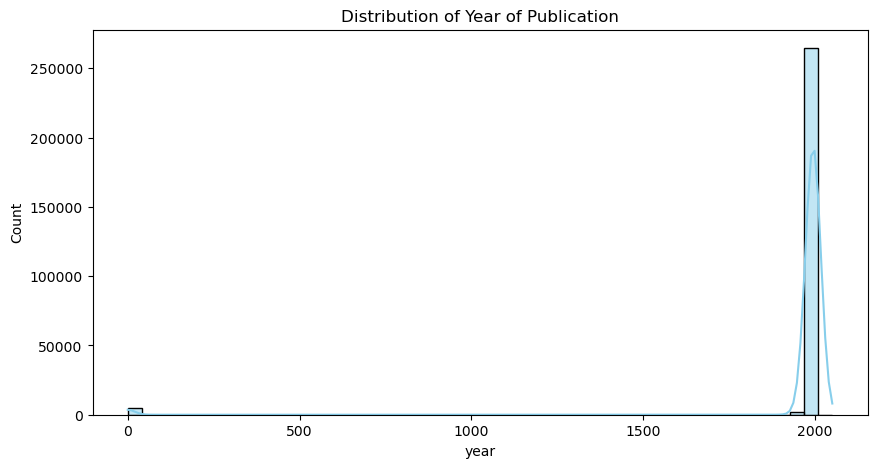

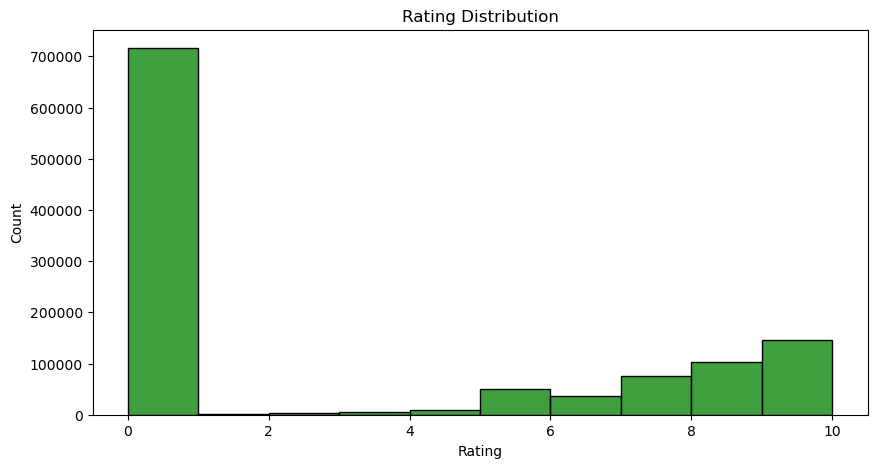

In [ ]:
# Data visualization for books' year of publication
plt.figure(figsize=(10, 5))
sns.histplot(books['year'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Year of Publication')
plt.show()

# Visualize rating distribution
plt.figure(figsize=(10, 5))
sns.histplot(ratings['rating'], bins=10, kde=False, color='green')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

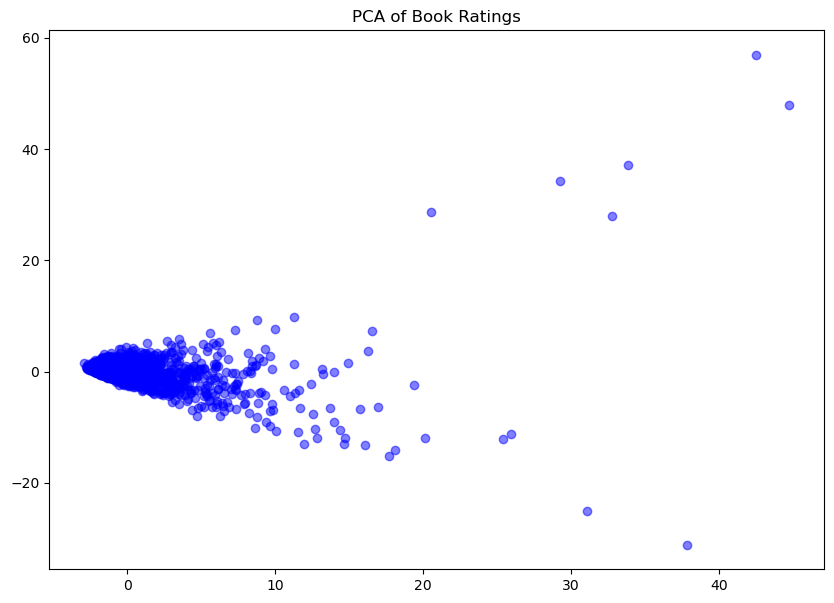

In [ ]:
# Merge datasets for analysis
ratings_with_books = ratings.merge(books, on='ISBN')

# Filter users who have rated more than 200 books
user_rating_count = ratings['user_id'].value_counts()
active_users = user_rating_count[user_rating_count > 200].index
filtered_ratings = ratings[ratings['user_id'].isin(active_users)]

# Filter books with at least 50 ratings
book_rating_count = ratings_with_books.groupby('title')['rating'].count().reset_index()
book_rating_count.rename(columns={'rating': 'num_of_ratings'}, inplace=True)
popular_books = book_rating_count[book_rating_count['num_of_ratings'] >= 50]

# Merge with ratings to include only popular books
final_ratings = filtered_ratings.merge(books, on='ISBN')
final_ratings = final_ratings[final_ratings['title'].isin(popular_books['title'])]
final_ratings.drop_duplicates(['user_id', 'title'], inplace=True)

# Create a pivot table for clustering (user_id vs. book title)
book_pivot = final_ratings.pivot_table(index='title', columns='user_id', values='rating').fillna(0)

# Normalize data using StandardScaler
scaler = StandardScaler()
book_pivot_scaled = scaler.fit_transform(book_pivot)

# Apply PCA to reduce dimensions for clustering
pca = PCA(n_components=2)
book_pca = pca.fit_transform(book_pivot_scaled)

# Visualizing PCA results
plt.figure(figsize=(10, 7))
plt.scatter(book_pca[:, 0], book_pca[:, 1], c='blue', alpha=0.5)
plt.title('PCA of Book Ratings')
plt.show()

C:\Users\Mitra   Nouri\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Mitra   Nouri\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\Mitra   Nouri\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Mitra   Nouri\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\Mitra   Nouri\anaconda3\Lib\subprocess.py", line 1538, in _execute_child


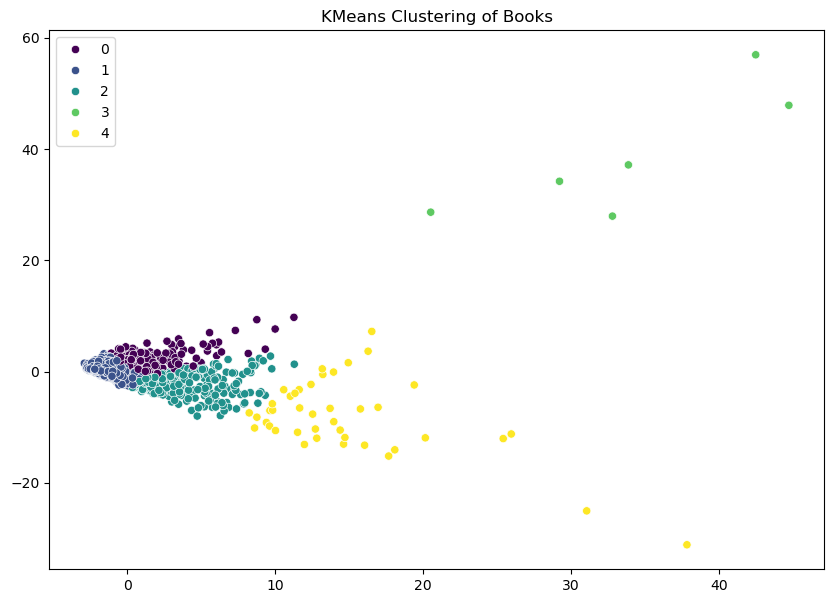

C:\Users\Mitra   Nouri\AppData\Local\Temp\ipykernel_15976\691618691.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  books.groupby('cluster').apply(lambda x: x[['title', 'author']].head(10))


In [ ]:
# Clustering using KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(book_pca)

# Add cluster information only to the books included in clustering
books_clustered = pd.DataFrame({
    'title': book_pivot.index,
    'cluster': clusters
})

# Merge the clustered information back to the original books dataframe
books = books.merge(books_clustered, on='title', how='left')

# Visualize clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=book_pca[:, 0], y=book_pca[:, 1], hue=clusters, palette='viridis')
plt.title('KMeans Clustering of Books')
plt.show()

# View the cluster labels
books.groupby('cluster').apply(lambda x: x[['title', 'author']].head(10))

# Save the clustered dataset for further analysis
books.to_csv('clustered_books.csv', index=False)


In [ ]:
# Import necessary libraries
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pickle

# Train the NearestNeighbors model (if not already done)
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(book_pivot)

# Find the index of the book 'The Da Vinci Code'
book_id = np.where(final_rating['title'] == "The Da Vinci Code")[0][0]

# Get book names for suggestions
book_names = [book_pivot.index[book_id] for book_id in suggestion]

# Get the image URLs for the suggested books
image_urls = [final_rating[final_rating['title'] == name].iloc[0]['image_url'] for name in book_names]

# Save the model and other data using pickle
import pickle
pickle.dump(model, open('artifacts/model.pkl', 'wb'))
pickle.dump(book_names, open('artifacts/book_names.pkl', 'wb'))
pickle.dump(final_rating, open('artifacts/final_rating.pkl', 'wb'))
pickle.dump(book_pivot, open('artifacts/book_pivot.pkl', 'wb'))

# Print image URLs
for url in image_urls:
    print(url)

# Function to recommend books based on 'The Da Vinci Code'
def recommend_book(book_name="The Da Vinci Code"):
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(book_pivot.iloc[book_id, :].values.reshape(1, -1), n_neighbors=6)

    print(f"You searched '{book_name}'\n")
    print("The suggested books are: \n")
    for i in range(1, len(suggestion[0])):  # Start from 1 to skip the searched book itself
        print(book_pivot.index[suggestion[0][i]])

# Test the function with 'The Da Vinci Code'
recommend_book("The Da Vinci Code")


NameError: name 'final_rating' is not defined

In [ ]:
# Test the function
recommend_book("Harry Potter and the Chamber of Secrets (Book 2)")
